Note: I accidentally deleted the original notebook that I created. This version has fewer annotations than you are probably used to seeing. 

We've been organizing our data so far as lists of lists. Here's an example.

In [1]:
data = [
    ["Oleg", 25, "Student", "Computer Science"],
    ["Anaya", 23, "Student", "Informatics"],
    ["Xiuying", 43, "Professor", "Statistics"],
    ["Robert", 62, "Professor", "Computer Science"]
]

To get data from a list of lists, you simply have to know the index of the relevant row and the index of the relevant column. To find the department of Xiuying:

In [2]:
data[2][3]

'Statistics'

What if you didn't know which row was Xiuying? You'd have to iterate throw each row and check.

In [3]:
for row in data:
    name = row[0]
    if name == "Xiuying":
        department = row[3]
        print(row[3])

Statistics


Pandas makes it easier to organize and explore our data. Let's import pandas and use the alias ``pd``. 

In [4]:
import pandas as pd

Pandas organizes data in a structure known as a data frame. You can convert a list of lists to a data frame by passing it to the pandas method ``DataFrame``.

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,0,1,2,3
0,Oleg,25,Student,Computer Science
1,Anaya,23,Student,Informatics
2,Xiuying,43,Professor,Statistics
3,Robert,62,Professor,Computer Science


As an added bonus, if you're using jupyter notebook, it automatically formats pandas data frames whenever you print them out.

One of the key advantages of pandas is that you can name columns and rows. Name columns by assigning a list of column names to the ``column`` attribute of your data frame.

In [7]:
df.columns = ['name', 'age', 'status', 'department']

In [8]:
df

,name,age,status,department
0,Oleg,25,Student,Computer Science
1,Anaya,23,Student,Informatics
2,Xiuying,43,Professor,Statistics
3,Robert,62,Professor,Computer Science


If you don't provide column names or row names, the default behavior is simply to number them, starting from 0. 

Let's use Pandas to organize some data that we get from Twitter.

In [9]:
API_KEY = ""
API_SECRET = ""

In [10]:
import tweepy
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
c = tweepy.Cursor(api.user_timeline, id="IUBloomington")

In [12]:
tweet_data = []

In [13]:
for tweet in c.items(500):
    tid = tweet.id
    hour_created = tweet.created_at.hour
    favorite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    source = tweet.source
    text = tweet.text
    this_tweet = [tid, hour_created, source, text, favorite_count, retweet_count]
    tweet_data.append(this_tweet)

In [14]:
tweet_data[:4]

[[830950002012913665,
  1,
  'Twitter Web Client',
  'RT @ichchokey: IU IS THIS THE 2016-17 CROSSROADS CUP CHAMPIONS https://t.co/kE16ZrR7xO',
  0,
  25],
 [830949954856374272,
  1,
  'Twitter Web Client',
  'RT @Hoosier_Hockey: HOOSIERS WIN THE ICHC CONFERENCE CHAMPIONSHIP 9-3',
  0,
  15],
 [830949715327983616,
  1,
  'Twitter Web Client',
  "RT @IUWSoccer: #IUWS was recognized at today's basketball game for winning the Herbert Cup in the fall! ⚪️🔴🏆 https://t.co/9N90kNi8wD",
  0,
  28],
 [830949542535299074,
  1,
  'Sprout Social',
  '@lizzard723 We hope you know this is going on your permanent record...\njust kidding. (or are we?)',
  0,
  0]]

Each tweet is represented by a list that contains 6 elements: the id, hour created, source, text, favorite count, and retweet count, in that order. 

Let's turn it into a Pandas data frame.

In [15]:
df = pd.DataFrame(tweet_data)
df.columns = ["tid", "hour_created", "source", "text", "favorite_count", "retweet_count"]

The ``head`` method on a data frame is a handy way just to print the first few rows of a data frame (rather than the whole thing).

In [16]:
df.head()

,tid,hour_created,source,text,favorite_count,retweet_count
0,830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
1,830949954856374272,1,Twitter Web Client,RT @Hoosier_Hockey: HOOSIERS WIN THE ICHC CONF...,0,15
2,830949715327983616,1,Twitter Web Client,RT @IUWSoccer: #IUWS was recognized at today's...,0,28
3,830949542535299074,1,Sprout Social,@lizzard723 We hope you know this is going on ...,0,0
4,830947783280570368,1,Twitter Web Client,RT @IUJSoM: Good luck to all Jacobs nominees t...,0,5


It's easy to name columns. Each column represents an attribute of some sort, so we can simply name the columns that attribute. 

It's a bit harder to name rows. Sometimes, the number from 0 onward is sufficient. Other times, you may want to use something else that uniquely identifies each row. In this case, we can use the Tweet IDs we obtained as the unique identifier for each row. We can name rows by assigning a list of values to the ``index`` attribute of the data frame. 

In [17]:
df.index = df['tid']
df.head()

,tid,hour_created,source,text,favorite_count,retweet_count
tid,,,,,,
830950002012913665,830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830949954856374272,830949954856374272,1,Twitter Web Client,RT @Hoosier_Hockey: HOOSIERS WIN THE ICHC CONF...,0,15
830949715327983616,830949715327983616,1,Twitter Web Client,RT @IUWSoccer: #IUWS was recognized at today's...,0,28
830949542535299074,830949542535299074,1,Sprout Social,@lizzard723 We hope you know this is going on ...,0,0
830947783280570368,830947783280570368,1,Twitter Web Client,RT @IUJSoM: Good luck to all Jacobs nominees t...,0,5


We simply assigned the ``tid`` column to serve as the row names. Since we've done that, we can simply drop the ``tid`` column since they're preserved in the row names.

In [18]:
del df['tid']

# Selecting Data

I'm going to make a smaller version of our dataframe to demonstrate selection, just so we're not printing out a bunch of stuff every time. 

In [19]:
sample = df.head()

In [20]:
sample.shape

(5, 5)

Sample is just the first 5 rows of data. 

## Selecting Columns

Select columns by using bracket notation and inserting the name of the column.

In [21]:
sample['source']

tid
830950002012913665    Twitter Web Client
830949954856374272    Twitter Web Client
830949715327983616    Twitter Web Client
830949542535299074         Sprout Social
830947783280570368    Twitter Web Client
Name: source, dtype: object

## Selecting Multiple Columns

Select multiple columns by providing a list of column names in the brackets.

In [22]:
sample[['source', 'retweet_count']]

,source,retweet_count
tid,,
830950002012913665,Twitter Web Client,25
830949954856374272,Twitter Web Client,15
830949715327983616,Twitter Web Client,28
830949542535299074,Sprout Social,0
830947783280570368,Twitter Web Client,5


## Selecting Rows by their Name

To select a row using its name, write ``.loc`` after the data frame object, then insert the name of the row in brackets.

In [23]:
sample.loc[830950002012913665]

hour_created                                                      1
source                                           Twitter Web Client
text              RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...
favorite_count                                                    0
retweet_count                                                    25
Name: 830950002012913665, dtype: object

You can also select multiple rows by providing a list of row names.

In [24]:
sample.loc[[830950002012913665, 830947783280570368]]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830947783280570368,1,Twitter Web Client,RT @IUJSoM: Good luck to all Jacobs nominees t...,0,5


## Selecting Rows by their Position

You can select rows by their position instead of by row label using ``.iloc``. 

Here, I use ``iloc`` to get the 3rd row. 

In [25]:
sample.iloc[2]

hour_created                                                      1
source                                           Twitter Web Client
text              RT @IUWSoccer: #IUWS was recognized at today's...
favorite_count                                                    0
retweet_count                                                    28
Name: 830949715327983616, dtype: object

Here I'm getting the 1st and the 4th row.

In [26]:
sample.iloc[[0, 3]]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830949542535299074,1,Sprout Social,@lizzard723 We hope you know this is going on ...,0,0


# Using ``loc`` to get a specific cell

You can use ``loc`` to get the value of a specific named row and column. Separte the rows you want from the columns you want with a column. For example, what's the ``favorite_count`` of tweet 780380150382809088? 

In [27]:
sample.loc[830950002012913665, "favorite_count"]

0

You can get multiple column values from multiple tweets in this fashion. Just separate the row names from the column names with a comma.  

What's the favorite count AND the retweet count of tweets 780226076995792896 and 780214484094681088?

In [28]:
sample.loc[[830950002012913665, 830947783280570368], ["favorite_count", "retweet_count"]]

,favorite_count,retweet_count
tid,,
830950002012913665,0,25
830947783280570368,0,5


# Boolean Indexing

I'm going to make a list of ``True``s and ``False``s.

In [29]:
b_index = [False, True, False, False, True]

Now, I'm going to pass this list of Booleans to the ``sample`` data frame's bracket notation.

In [30]:
sample[b_index]

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830949954856374272,1,Twitter Web Client,RT @Hoosier_Hockey: HOOSIERS WIN THE ICHC CONF...,0,15
830947783280570368,1,Twitter Web Client,RT @IUJSoM: Good luck to all Jacobs nominees t...,0,5


Notice that there are only two rows in the output. If you past a list of Booleans to a data frame's bracket notation, it will**only return the rows that correspond to a True value**. So in ``b_index``, the 2nd and 5th elements are ``True``, the rest are false. That is way ``sample[b_index]`` returned only the 2nd and 5th row. 

At first glance, this seems a little contrived and not very useful, but it will help us with something known as Conditional Subsetting.

# Conditional Subsetting

Conditional subsetting helps us choose *only rows that meet a certain condition*. We can find out if a row meets a certain condition using a Boolean operator. 

For example: for which rows is the number of retweets greater than 20?

In [31]:
sample["retweet_count"] > 20

tid
830950002012913665     True
830949954856374272    False
830949715327983616     True
830949542535299074    False
830947783280570368    False
Name: retweet_count, dtype: bool

This condition is true for some, but not nall of the rows.

Note that this output is a **list of Booleans**. 

So we can use this as an input to the bracket notation. 

In [32]:
b_index = sample["retweet_count"] > 20
conditional_subset = sample[b_index] # b_index is a list of Trues and Falses
conditional_subset

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830949715327983616,1,Twitter Web Client,RT @IUWSoccer: #IUWS was recognized at today's...,0,28


We can just merge this altogether in a single line of code.

In [33]:
conditional_subset = sample[ sample["retweet_count"] > 20 ]

This is extremely helpful if you want to conduct your data mining analysis on a specific subset of the data.

Instead of using ``sample`` let's return to the original data in ``df``. Let's say for research reasons you only want to study posts that are really popular. So you want to subset from your original data the rows that have a ``retweet_count`` value greater than 20. 

In [34]:
df.shape

(500, 5)

There are 500 samples in the original data.

In [35]:
popular_tweets = df[df['retweet_count'] > 20]

In [36]:
popular_tweets.shape

(58, 5)

We can see the number of rows in our new data frame - it's the first elemennt in the above tuple. Each of these subset tweets has a `retweet_count` greater than 20

In [37]:
popular_tweets.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830949715327983616,1,Twitter Web Client,RT @IUWSoccer: #IUWS was recognized at today's...,0,28
830861881334169601,19,Twitter for iPhone,RT @IndianaMBB: #GoIU ⚪🔴 https://t.co/XdzlnLIctj,0,50
830779028948865024,14,Twitter for iPad,RT @IndianaMBB: GAMEDAY!!!\n📍: Simon Skjodt As...,0,45
830650319277264896,5,Twitter Web Client,RT @OurIndiana: Tomorrow we welcome @Firecrack...,0,21


You really can subset the data in any way you like using this type of code. 

Let's say I want all Tweets that were made on iPhone.

In [38]:
iphone_tweets = df[df['source'] == "Twitter for iPhone"]
iphone_tweets.shape

(49, 5)

We've selected the 105 tweets from the original 500 that were made on iPhone.

In [39]:
iphone_tweets.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830861881334169601,19,Twitter for iPhone,RT @IndianaMBB: #GoIU ⚪🔴 https://t.co/XdzlnLIctj,0,50
830861726270750720,19,Twitter for iPhone,RT @OurIndiana: 🏀: vs Michigan\n🕐: 1p\n📺: @CBS...,0,12
830861584754999296,19,Twitter for iPhone,"RT @InsideIU: Happy birthday, Abraham Lincoln!...",0,5
829822221426290690,22,Twitter for iPhone,RT @IUTheatre: Final weekend of Duchess! Final...,0,2
829685005660086276,13,Twitter for iPhone,RT @IndianaMBB: GAMEDAY!!!\n📍: Simon Skjodt As...,0,142


If you have multiple conditions that must all be true, encapsulate them in parentheses and separate them with the ampersand character &.

I want all tweets that were made on iPhone AND have a favorite count greater than 20.

In [40]:
pop_iphone = df[(df['source'] == "Twitter for iPhone") & (df['favorite_count'] > 20)]
print(pop_iphone.shape)
pop_iphone.head()

(13, 5)


,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
829035704021823488,18,Twitter for iPhone,Congratulations to IU alumnus and @IndianaMBB ...,174,35
828364094076047360,22,Twitter for iPhone,Good luck to @HoosierFootball alumnus Tevin Co...,474,208
827147922898878465,13,Twitter for iPhone,"Happy Groundhog Day, Hoosiers! The person who ...",61,13
826051681452437504,12,Twitter for iPhone,"It's cold out there this morning, Hoosiers. Ma...",70,18
824971709992300544,13,Twitter for iPhone,Current Status: ❄️❄️❄️,142,33


There are 24 tweets that meet this condition. 

# Exploring Columns

You can subset a column and use a pandas method to explore it a bit. 

Let's explore favorite_count.

What's the average amount of favorites?

In [41]:
favorites = df['favorite_count']
favorites.mean()

11.61

What's the standard deviation of the favorites?

In [42]:
favorites.std()

51.81609513877753

What is the most favorites a tweet has gotten?

In [43]:
favorites.max()

605

Get all of these descriptive statistics in one go with the method ``.describe()``.

In [44]:
favorites.describe()

count    500.000000
mean      11.610000
std       51.816095
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max      605.000000
Name: favorite_count, dtype: float64

# Visualizing 

Of course, we can use the handy subsetting features to help us with our visualizations. 

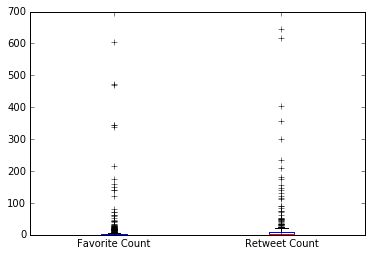

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

favorites = df['favorite_count']
retweets = df['retweet_count']
plt.boxplot([favorites, retweets], labels=["Favorite Count", "Retweet Count"])
plt.show()

Both favorite counts and retweet counts are concentrated at the low values but there are some notable outliers. This makes sense; most tweets will get few favorites and retweets, but on occassion a tweet will get many favorites or retweets.

Are favorites and retweets correlated?

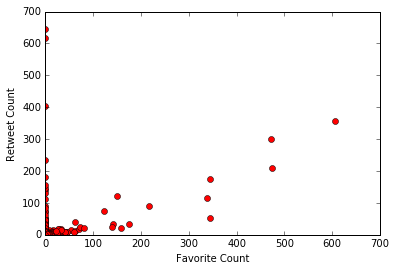

In [46]:
plt.plot(favorites, retweets, "ro")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.show()

Doesn't seem so. There are some tweets that were favorited 0 times but were retweeted hundreds of times. 

# Grouping an Aggregating

Using pandas it is easy to group your data according to a certain label and then extract aggregate statistics. 

First, you have to make a groupby object and desginate which feature you want to group your rows by.

In [47]:
source_group = df.groupby("source")
source_group

Not very helpful, yet. ``source_group`` represents a data structure where all the rows are grouped by the ``source`` they have (e.g. iPhone rows are together, Android rows are together). But to get useful information from a groupby object we also need to indicate the aggregate statistic we want. 

For example, tell me the total number of samples per source:

In [48]:
source_group['source'].agg("count")

source
Sprout Social         156
Twitter Web Client    278
Twitter for iPad       17
Twitter for iPhone     49
Name: source, dtype: int64

The string in the brackets tells pandas which column you want to aggregate, and the thing in the parentheses after ``agg`` tells pandas how you want to aggregate them.

When group by source, what is the average favorite count?

In [49]:
source_group['favorite_count'].agg('mean')

source
Sprout Social         11.455128
Twitter Web Client     9.428058
Twitter for iPad       5.764706
Twitter for iPhone    26.510204
Name: favorite_count, dtype: float64

When grouped by source, what is the average favorite count *and* the average retweet count?

In [50]:
source_group[['favorite_count', 'retweet_count']].agg("mean")

,favorite_count,retweet_count
source,,
Sprout Social,11.455128,8.416667
Twitter Web Client,9.428058,16.802158
Twitter for iPad,5.764706,14.294118
Twitter for iPhone,26.510204,33.163265


# Saving data frames as CSVs

Pandas is also useful because you can save the data you have organized as a ``.csv`` comma-separated value file. You can then explore your data in a spreadsheet program like excel.

Use the method ``to_csv`` and provide to it the name of the file you'd like to save.

In [51]:
df.to_csv("IUB500Tweets.csv")

Of course, once you've saved your data, you can easily load it back into python using ``read_csv``. Provide the file name, the position of the index column, and if you're using Windows you may need to specify encoding. 

In [52]:
new_df = pd.read_csv("IUB500Tweets.csv", index_col=0, encoding="latin1")

In [53]:
new_df.head()

,hour_created,source,text,favorite_count,retweet_count
tid,,,,,
830950002012913665,1,Twitter Web Client,RT @ichchokey: IU IS THIS THE 2016-17 CROSSROA...,0,25
830949954856374272,1,Twitter Web Client,RT @Hoosier_Hockey: HOOSIERS WIN THE ICHC CONF...,0,15
830949715327983616,1,Twitter Web Client,RT @IUWSoccer: #IUWS was recognized at today's...,0,28
830949542535299074,1,Sprout Social,@lizzard723 We hope you know this is going on ...,0,0
830947783280570368,1,Twitter Web Client,RT @IUJSoM: Good luck to all Jacobs nominees t...,0,5


# Pandas Data Frames works just fine with Scikit-Learn

If you organized your data in a data frame, you can pass it straight into a scikit-learn algorith without any problems.

In [54]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
alldata = np.hstack((iris.data, iris.target.reshape(-1, 1)))
df = pd.DataFrame(alldata, columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Here in ``df`` I have the Iris data, but in data frame format. We can subset as we please and throw the results into any sklearn model. I'll use an SVM.

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
# Using pandas subsetting, we extract the training features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [57]:
# Continue as usual

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.95999999999999996